In [1]:
!pip install wordcloud
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import re
import math
!pip install textblob
from textblob import TextBlob
plt.style.use('fivethirtyeight')

In [2]:
nurofen = pd.read_csv("Nurofen Sentiments.csv")

In [3]:
nurofen

,Unnamed: 0,Author ID,Tweet ID,Language,Created at,Text,Word Count,New Tweet,Word Count.1,Location,Retweet Count,Subjectivity,Polarity,Analysis,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1,1.210000e+18,1.690000e+18,en,2023-08-21 09:03:22+00:00,looking at my box of nurofen like what if i to...,15.0,looking box nurofen like what if took too many,9.0,NaN,0,0.500000,0.500000,Positive,positive,1.0,NaN,NaN,NaN
1,2,8.344408e+08,1.690000e+18,en,2023-08-21 08:59:17+00:00,@Mr_Fanta_Pants Offered me nothing - told me t...,9.0,Offered nothing told take Nurofen,5.0,NaN,0,0.000000,0.000000,Neutral,neutral,2.0,NaN,NaN,NaN
2,3,8.344408e+08,1.690000e+18,en,2023-08-21 08:06:34+00:00,"@stationmum101 I'm only taking Nurofen, they d...",11.0,I'm only taking Nurofen they didn't give anyt...,9.0,NaN,0,1.000000,0.000000,Neutral,neutral,4.0,NaN,NaN,NaN
3,4,8.780000e+17,1.690000e+18,en,2023-08-21 05:34:02+00:00,@so_very_small When I was a teen I used to loo...,37.0,When was teen used look at Nurofen capsules im...,22.0,NaN,0,0.512500,0.087500,Positive,positive,6.0,NaN,NaN,NaN
4,5,2.730508e+09,1.690000e+18,en,2023-08-21 03:39:19+00:00,@ChrisKSim75 @Jburdeu Panadol Forte bc the cod...,29.0,Panadol Forte bc codeine helps one sleep Nurof...,18.0,NaN,0,0.000000,0.000000,Neutral,neutral,7.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,1.430000e+18,1.690000e+18,en,2023-08-15 05:50:52+00:00,"@cordy223 Yeah I'm a bit scared, but determine...",53.0,Yeah I'm bit scared but determined do right ...,36.0,NaN,0,0.601190,-0.207143,Negative,positive,0.0,NaN,NaN,NaN
63,64,4.433750e+07,1.690000e+18,en,2023-08-15 00:27:18+00:00,"@delmaclifton Rest, hydrate try panadol and Nu...",13.0,Rest hydrate try panadol Nurofen may help pai...,10.0,NaN,0,0.000000,0.000000,Neutral,positive,0.0,NaN,NaN,NaN
64,65,4.720715e+09,1.690000e+18,en,2023-08-14 22:27:34+00:00,@ToMyPirateShip @margare05106690 Horizontal wi...,8.0,Horizontal pack nurofen,3.0,NaN,0,0.000000,0.000000,Neutral,neutral,52.0,NaN,NaN,NaN
65,66,1.263987e+08,1.690000e+18,en,2023-08-14 17:45:40+00:00,Ran out of nurofen for period pains. https://t...,8.0,Ran out nurofen period pains,4.0,NaN,0,0.000000,0.000000,Neutral,neutral,54.0,NaN,NaN,NaN


In [4]:
# Create a function to get the subjectivity
def getSub(text):
    return TextBlob(text).sentiment.subjectivity


# Create a function to get the polarity
def getPol(text):
    return TextBlob(text).sentiment.polarity

In [5]:
# Define a function to check if the input is a string
def is_string(input_text):
    return isinstance(input_text, str)

# Apply your functions with a condition to handle non-string values
nurofen['Subjectivity1'] = nurofen['New Tweet'].apply(lambda x: getSub(x) if is_string(x) else np.nan)
nurofen['Polarity1'] = nurofen['New Tweet'].apply(lambda x: getPol(x) if is_string(x) else np.nan)


In [6]:
nurofen

,Unnamed: 0,Author ID,Tweet ID,Language,Created at,Text,Word Count,New Tweet,Word Count.1,Location,...,Subjectivity,Polarity,Analysis,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Subjectivity1,Polarity1
0,1,1.210000e+18,1.690000e+18,en,2023-08-21 09:03:22+00:00,looking at my box of nurofen like what if i to...,15.0,looking box nurofen like what if took too many,9.0,NaN,...,0.500000,0.500000,Positive,positive,1.0,NaN,NaN,NaN,0.500000,0.500000
1,2,8.344408e+08,1.690000e+18,en,2023-08-21 08:59:17+00:00,@Mr_Fanta_Pants Offered me nothing - told me t...,9.0,Offered nothing told take Nurofen,5.0,NaN,...,0.000000,0.000000,Neutral,neutral,2.0,NaN,NaN,NaN,0.000000,0.000000
2,3,8.344408e+08,1.690000e+18,en,2023-08-21 08:06:34+00:00,"@stationmum101 I'm only taking Nurofen, they d...",11.0,I'm only taking Nurofen they didn't give anyt...,9.0,NaN,...,1.000000,0.000000,Neutral,neutral,4.0,NaN,NaN,NaN,1.000000,0.000000
3,4,8.780000e+17,1.690000e+18,en,2023-08-21 05:34:02+00:00,@so_very_small When I was a teen I used to loo...,37.0,When was teen used look at Nurofen capsules im...,22.0,NaN,...,0.512500,0.087500,Positive,positive,6.0,NaN,NaN,NaN,0.512500,0.087500
4,5,2.730508e+09,1.690000e+18,en,2023-08-21 03:39:19+00:00,@ChrisKSim75 @Jburdeu Panadol Forte bc the cod...,29.0,Panadol Forte bc codeine helps one sleep Nurof...,18.0,NaN,...,0.000000,0.000000,Neutral,neutral,7.0,NaN,NaN,NaN,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,63,1.430000e+18,1.690000e+18,en,2023-08-15 05:50:52+00:00,"@cordy223 Yeah I'm a bit scared, but determine...",53.0,Yeah I'm bit scared but determined do right ...,36.0,NaN,...,0.601190,-0.207143,Negative,positive,0.0,NaN,NaN,NaN,0.601190,-0.207143
63,64,4.433750e+07,1.690000e+18,en,2023-08-15 00:27:18+00:00,"@delmaclifton Rest, hydrate try panadol and Nu...",13.0,Rest hydrate try panadol Nurofen may help pai...,10.0,NaN,...,0.000000,0.000000,Neutral,positive,0.0,NaN,NaN,NaN,0.000000,0.000000
64,65,4.720715e+09,1.690000e+18,en,2023-08-14 22:27:34+00:00,@ToMyPirateShip @margare05106690 Horizontal wi...,8.0,Horizontal pack nurofen,3.0,NaN,...,0.000000,0.000000,Neutral,neutral,52.0,NaN,NaN,NaN,0.000000,0.000000
65,66,1.263987e+08,1.690000e+18,en,2023-08-14 17:45:40+00:00,Ran out of nurofen for period pains. https://t...,8.0,Ran out nurofen period pains,4.0,NaN,...,0.000000,0.000000,Neutral,neutral,54.0,NaN,NaN,NaN,0.000000,0.000000


In [7]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [8]:
nurofen['Analysis1'] = nurofen['Polarity1'].apply(getAnalysis)

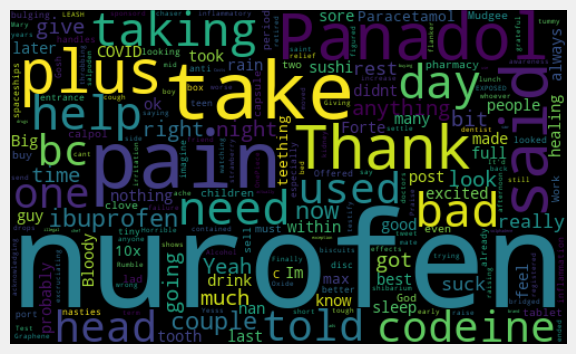

In [9]:
# Filter out non-string values (NaN or floats)
nurofen['New Tweet'] = nurofen['New Tweet'].astype(str)

# Plot Word Cloud
allWords = ' '.join([twts for twts in nurofen['New Tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Text(0.5, 0, 'Sentiments')

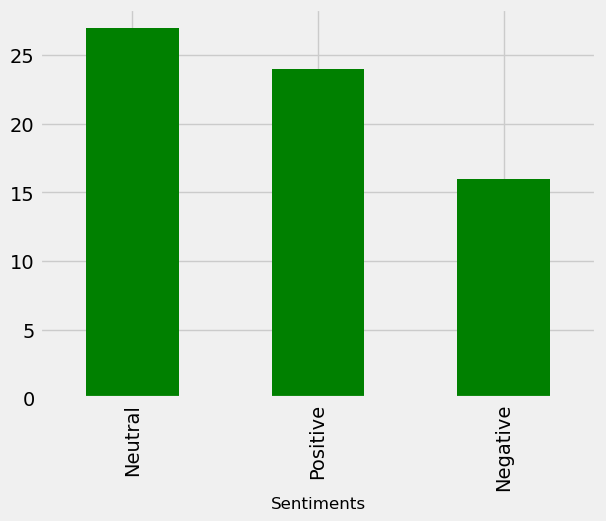

In [10]:
ax = nurofen['Analysis1'].value_counts().plot(kind='bar', color='green')
ax.set_xlabel("Sentiments", fontsize=12)

In [21]:
nurofen_data = nurofen.to_csv("Nurofen.csv", index=True)

In [119]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = pd.read_csv("Nurofen.csv")
text_data = data['New Tweet']
text_data = text_data.fillna('')

In [120]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)

In [121]:
feature_names = tfidf_vectorizer.get_feature_names_out()

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

X = data['New Tweet']
y = data['Results']

In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replace missing values with empty strings
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
    lowercase=True,  # Convert text to lowercase
    stop_words='english',  # Remove common English stop words
    max_features=10000  # Limit the number of features to a reasonable size
)

Xtrain_tfidf = tfidf_vectorizer.fit_transform(X_train)
Xtest_tfidf = tfidf_vectorizer.transform(X_test)

In [124]:
from sklearn. linear_model import LogisticRegression 
model1 = LogisticRegression()

# Train the model
model1.fit(Xtrain_tfidf, y_train)

LogisticRegression()

In [125]:
# Make predictions on the test set
y_pred = model1.predict(Xtest_tfidf)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(report)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


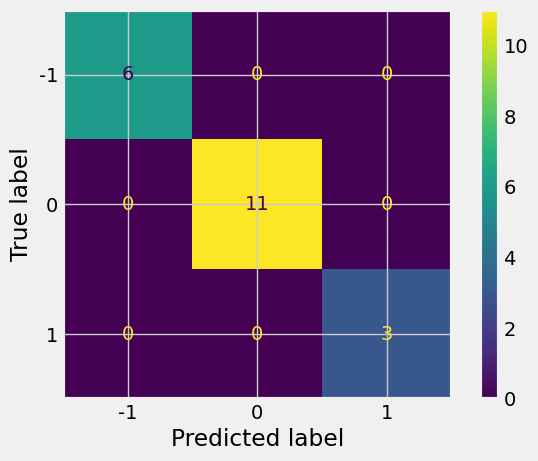

In [126]:
plot_confusion_matrix(model1, Xtest_tfidf, y_pred)
plt.show()